                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -238.565
Date:                Fri, 11 Mar 2022   AIC                            497.130
Time:                        14:22:52   BIC                            523.281
Sample:                             0   HQIC                           507.717
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1291      0.076     67.529      0.000       4.980       5.278
ar.L1         -0.8098      0.141     -5.730      0.000      -1.087      -0.533
ar.L2          0.0457      0.177      0.258      0.7

array([ 0.        ,  3.88259569, -3.13966816,  1.42588851, -8.89196452,
        1.33523626,  0.72869386,  7.51929692, -2.61899143, -6.58975468,
       -0.2920044 ,  6.75399592,  1.96091032,  0.28147663,  1.18886809,
       -1.87538753, -2.17115173,  0.90549495, -0.76935256, -0.76117577,
       -1.28878028, -1.03754891,  4.83562586, -1.55507287,  2.32114743,
       -3.4331721 , -2.50586155,  1.30069787,  4.16381422, -2.78912683,
        2.89556239, -3.32935396, -2.73591696, -0.33228807, -1.28025087,
        5.64093613, -1.08292581, -0.63859915,  3.26303615, -2.23139658,
       -4.67505461,  6.75795058, -3.72976904,  1.62817162, -3.34393058,
        6.92368316, -4.78300932, -3.05354893, -0.12257692,  3.20474275,
        4.76683492, -1.12349091,  0.40132013, -6.44888448, -0.7326888 ,
        3.83330803,  3.83038018, -2.46432579, -3.78890805,  6.94441146,
       -6.55853962, -0.21726798,  1.46418871,  0.78865446,  3.62864463,
       -6.91405713,  6.41809904, -3.5068446 ,  2.46493055, -2.46

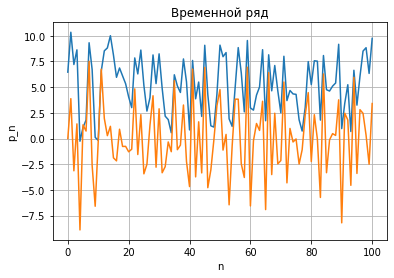

In [7]:
import numpy as np
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from math import sin
from random import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_max = 102

# Задаем ряд
price_ser_src = pd.Series([sin(x) + 10*random() for x in range(1, n_max)])
# p_ser = price_ser_src[::5]

# Находим mu (тренд)
# Простой способ -- первая разность
mu_arr = np.array([price_ser_src[i]-price_ser_src[i-1] if i > 0 else 0. for i in range(len(price_ser_src)) ])

# Находим параметры ARMA (подгоняем модель)
model = ARIMA(price_ser_src, order=(4, 0, 4))
model_fit = model.fit()
print(model_fit.summary())

# make prediction -- это пока вообще не трогаем
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

# График
plt.title("Временной ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(price_ser_src)
plt.plot(mu_arr)

# p_ser.reset_index(inplace=True, drop=True)
# p_ser

mu_arr


[100] [ 0.          3.88259569 -3.13966816  1.42588851 -8.89196452  1.33523626
  0.72869386  7.51929692 -2.61899143 -6.58975468 -0.2920044   6.75399592
  1.96091032  0.28147663  1.18886809 -1.87538753 -2.17115173  0.90549495
 -0.76935256 -0.76117577 -1.28878028 -1.03754891  4.83562586 -1.55507287
  2.32114743 -3.4331721  -2.50586155  1.30069787  4.16381422 -2.78912683
  2.89556239 -3.32935396 -2.73591696 -0.33228807 -1.28025087  5.64093613
 -1.08292581 -0.63859915  3.26303615 -2.23139658 -4.67505461  6.75795058
 -3.72976904  1.62817162 -3.34393058  6.92368316 -4.78300932 -3.05354893
 -0.12257692  3.20474275  4.76683492 -1.12349091  0.40132013 -6.44888448
 -0.7326888   3.83330803  3.83038018 -2.46432579 -3.78890805  6.94441146
 -6.55853962 -0.21726798  1.46418871  0.78865446  3.62864463 -6.91405713
  6.41809904 -3.5068446   2.46493055 -2.46313034 -2.13931165  5.5019884
 -4.31289645  0.98363228 -0.33528602 -0.04244913 -2.48007662 -1.09148249
  2.28839165  4.47077575 -2.23782926  2.321092

(array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
         -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
         -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
         -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
         -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
         -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
         -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
         -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
         -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
         -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
         -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
         -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
         -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
          0.50505051,   0.70707071,   0.90909091,   1.11111111,
          1.31313131,   1.51515152,   1.71717172,   1.91919192,
          2.12121212,   2.32323232,   2.

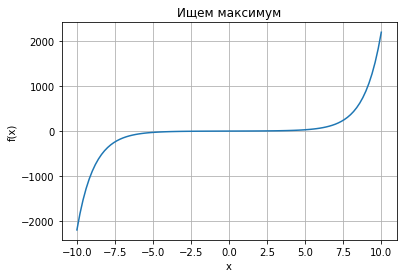

In [8]:
from scipy.optimize import minimize, minimize_scalar
import math
import functools


def math_exp(K: float, inv: float, mu: float, i: int):
    res = -inv/K * (math.exp(K*mu*i) + math.exp(-K*mu*i) - 2) 
    return res

def f(x):
    mu = 1
    t = 1
    return -1/x*(math.exp(x*mu*t) + math.exp(-x*mu*t) - 2)





# Считаем алгоритм

inv_0 = 100
inv_ser = [inv_0]

"""
for cnt, price in enumerate(price_ser_src):
    if cnt == 0:
        continue
    f = functools.partial(math_exp, inv = inv_ser[cnt-1], mu = mu[cnt-1], i=cnt-1)    
    K = minimize_scalar(f, bounds=(-1, 1), method='bounded', ).x
    inv_ser.append(K)
    
inv_ser
"""
print(inv_ser, mu_arr)


x_arr = np.linspace(-10, 10., 100)
f_arr = np.array([f(x_arr[i]) for i in range(len(x_arr))])



# f = functools.partial(math_exp, inv = 10, mu = 1, i=1)    
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("f(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)

x_arr, f_arr









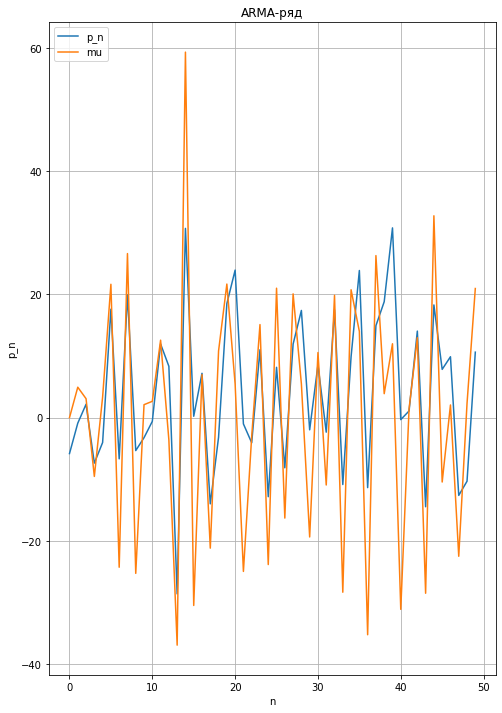

(array([ -5.83654602,  -0.90606561,   2.16256044,  -7.38365595,
         -4.04361968,  17.58924056,  -6.6923147 ,  19.92289575,
         -5.3530342 ,  -3.25628779,  -0.61450779,  11.9479513 ,
          8.32169513, -28.60266859,  30.70055618,   0.21625865,
          7.1875552 , -13.99613506,  -3.17827184,  18.4877746 ,
         23.93451532,  -1.02541748,  -4.08195245,  11.01073961,
        -12.83532334,   8.15953451,  -8.14495145,  11.93220459,
         17.38647539,  -1.98229985,   8.57269171,  -2.36292147,
         17.4754895 , -10.8598851 ,   9.88135562,  23.86942459,
        -11.3640829 ,  14.92242254,  18.80416006,  30.78389869,
         -0.32982239,   1.07452812,  14.03542363, -14.4667022 ,
         18.27931352,   7.82671478,   9.87681065, -12.62468051,
        -10.3253376 ,  10.6194151 ]),
 array([  0.        ,   4.93048041,   3.06862605,  -9.54621639,
          3.34003627,  21.63286024, -24.28155526,  26.61521046,
        -25.27592995,   2.09674641,   2.64178   ,  12.56245909,
  

In [11]:
# Генерируем и визуализируем ARMA(4,4)-ряд


import random

n_max = 50

a = [10., 8., 6., 2., .1]
d = [1., .6, .4, .1, .06]

p = [-1., 3., .1, -.8, .5]
for i in range(5, n_max+5):
    p_next = a[0]*p[4] + a[1]*p[3] + a[2]*p[2] + a[3]*p[1] + a[4]*p[0]
    xi = np.random.normal(0., 10., 5)
    p_next += sum([d[i]*xi[i] for i in range(5)])
    p.append(p_next)
    
p_arr = np.array(p[5:])
mu_arr = np.diff(p_arr)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr = np.append(0., mu_arr)

n_lst = list(range(n_max))

figure = plt.figure(figsize=(8, 12))
plt.title("ARMA-ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr, mu_arr)
plt.legend(['p_n', 'mu'], loc="upper left")

plt.show()
p_arr, mu_arr 


## Alg0 v.0.1 

Работает в двух модификациях: 

1) без добавления шума, когда g(t) = E_g(t), т.е. функция выигрыша равна своему матожиданию. В этом случае для положительных I_0, K всегда положительно или равно 0, и это чисто бычья стратегия. Для отрицательных I_0 K всегда отрицательно или равно 0, и это чисто медвежья стратегия. Т.е. нет смены знака по ходу выполнения алгоритма, каким бы ни был входной тренд.

2) к матожиданию процесса при вычислении функции g(t) мы добавляем нормальный белый шум N(0, 10). В этом случае появляется знакопеременность у K, и стратегия становится смешанной.


1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0:


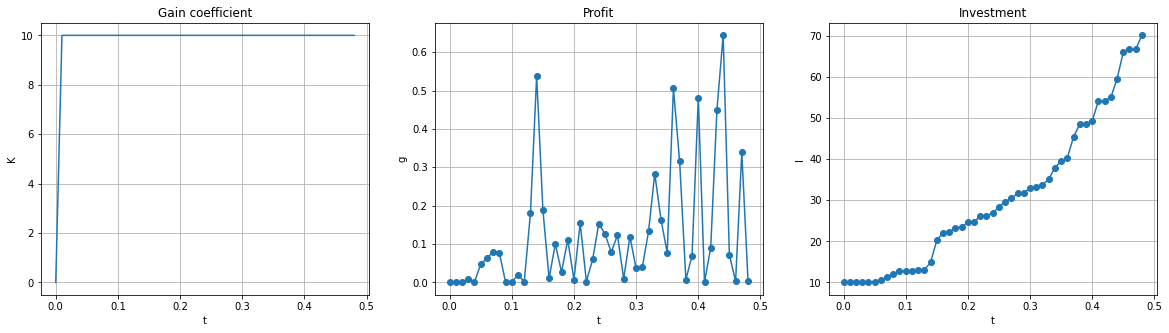



2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0:


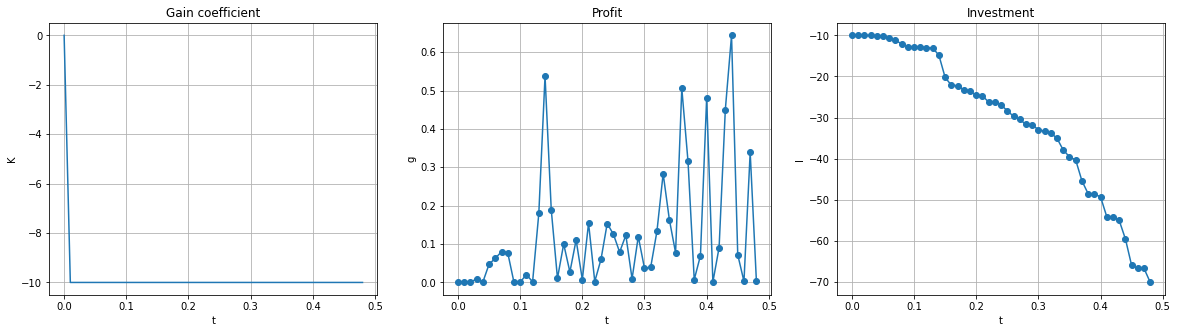



3. I_0=10, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise -- белый шум 0.1*N(0,1)


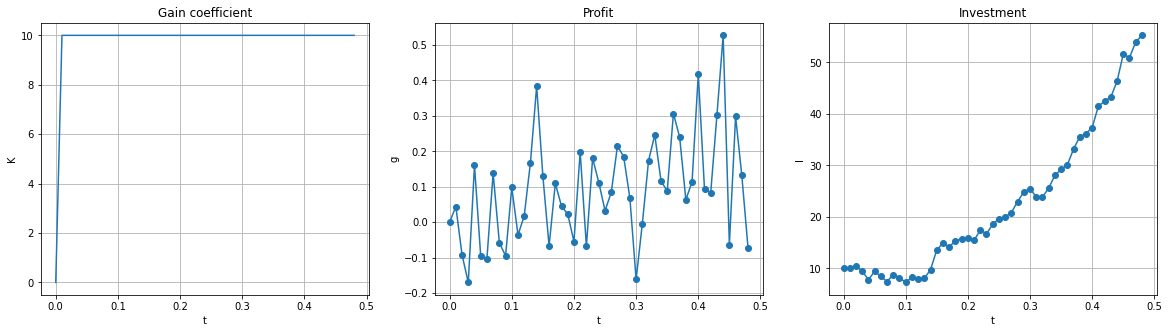

In [36]:
from math import fabs, exp
from scipy.optimize import minimize_scalar
import functools
import random


def minus_eg(k, _inv, _mu, _delta_t):
    """Функция Eg, которую мы максимизируем, взятая со знаком минус, потому что scipy.optimize ищет минимум."""
    res = -_inv/k*(math.exp(k*_mu*_delta_t) + math.exp(-k*_mu*_delta_t) - 2.)
    return res


def calc_alg0(p_arr, mu_arr, inv0, xi = lambda: 0.):
    # Ограничения на K
    k_min = -10
    k_max = 10
    # Массивы
    t_max = float(n_max)/100
    t_arr = np.linspace(0., t_max, n_max + 1)
    dt = t_arr[1]-t_arr[0]
    k_arr = np.zeros(n_max+1)
    g_arr = np.zeros(n_max+1)
    inv_arr = np.zeros(n_max+1)
    inv_arr[0] = inv0    
    #print('Starting alg0, I_0 = ', inv0)    
    # Задаем начальную инвестицию и профит
    tm2, invm2, mum2, gm2, Km2,  = -2, inv_arr[0], 0., 0., 0.
    if Km2 > 0:
        desm2 = 'Buy'
    elif Km2 < 0:
        desm2 = 'Sell'
    else:
        desm2 = 'Nothing'
    # print(f't={tm2}\t I={invm2}\t mu={mum2}\t g={gm2} \t K={Km2} -> {desm2}')
    
    tm1, invm1, Km1, gm1, mum1 = -1, inv_arr[0], 0., 0., 0.
    if Km1 > 0:
        desm1 = 'Buy'
    elif Km1 < 0:
        desm1 = 'Sell'
    else:
        desm1 = 'Nothing'
    # print(f't={tm1}\t I={invm1}\t mu={mum1}\t g={gm1} \t K={Km1} -> {desm1}')
    
    for i in range(n_max-1):
        des_str = ''
        if fabs(mu_arr[i]) <= 1:
            k_arr[i] = 0.
            g_arr[i] = 0.
            des_str = 'Nothing'
            inv_arr[i+1] = inv_arr[i] 
        else:
            # mu_sign = mu_arr[i]/fabs(mu_arr[i])
            mu_normalized = mu_arr[i]/10
            minus_eg_cur = functools.partial(minus_eg, _inv=inv_arr[i], _mu = mu_normalized, _delta_t=dt)
            k_cur = minimize_scalar(minus_eg_cur, bounds=(k_min, k_max), method='bounded').x 
            k_arr[i] = k_cur
            g_arr[i] = -minus_eg_cur(k_cur) + xi()
            # g_test = calc_eg(k_cur, inv_arr[i], mu_sign, dt)
            inv_arr[i+1] = inv_arr[i] + k_arr[i]*g_arr[i]
            if k_cur >= 0:
                des_str = 'Buy'
            else:
                des_str = 'Sell'    
            # if i < 10 or i % 10 == 0:
            #    print(f'iter={i}, t={round(t_arr[i], 2)}, I={round(inv_arr[i], 4)}, mu={round(mu_normalized, 4)}',
            #    f'g={round(g_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(inv_arr[i]/k_arr[i], 2)}')    
    k_ser = pd.Series(k_arr[:-2], index=t_arr[:-2])
    g_ser = pd.Series(g_arr[:-2], index=t_arr[:-2])
    inv_ser = pd.Series(inv_arr[:-2], index=t_arr[:-2])
    
    plt.figure(figsize=(20, 5))
    
    plt.subplot(131)
    plt.plot(k_ser[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("Gain coefficient")
    plt.grid() 

    plt.subplot(132)
    plt.plot(g_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("g")
    plt.title("Profit")
    plt.grid() 
    
    plt.subplot(133)
    plt.plot(inv_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("I")
    plt.title("Investment")
    plt.grid() 
    
    plt.show()


# Три разных случая
# 1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0
print('1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0:')
calc_alg0(p_arr, mu_arr, 10)
print('='*10)
print()
print()

# 2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0
print('2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0:')
calc_alg0(p_arr, mu_arr, -10)
print('='*10)
print()
print()

# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise = 10, lambda: .1*np.random.normal(0, 1)    
print('3. I_0=10, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise -- белый шум 0.1*N(0,1)')
xi_noise = lambda: .1*np.random.normal(0, 1)  
calc_alg0(p_arr, mu_arr, 10, xi_noise)    
print('='*10)
print()
print()

